In [1]:
from IonModel_Libraries import *

The Double Weigthed Binomial distribution used by CDMS is a discrete probability distribution which allows us to account for the Fano factor $F$ when calculating the probability  P(N|$\mu$,F) to create $N$ pairs when $\mu$ are expected

I spent quite a large amount of time coding it in matrix form...... for us to benefit from numpy fast computing time.

The function is "Prob_DWB_arraymu(N,$\mu$,F)" coucou

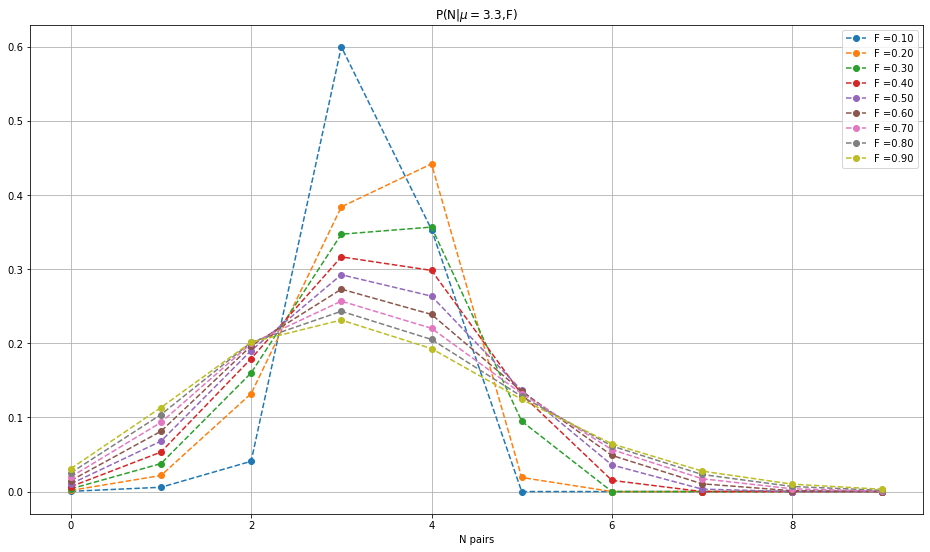

In [14]:
N = np.array(range(10),dtype=int)
mu = 3.3
F_list = np.arange(0.1,1,0.1)
fig = plt.figure(figsize=(16,9))
_ = [plt.plot(N,Prob_DWB_arraymu(N,mu,F),'o--',label=f"F ={F:.2f}") for F in F_list]
plt.title(f"P(N|$\mu={mu}$,F)")
plt.xlabel("N pairs")
plt.grid(which = 'both')
_ = plt.legend()

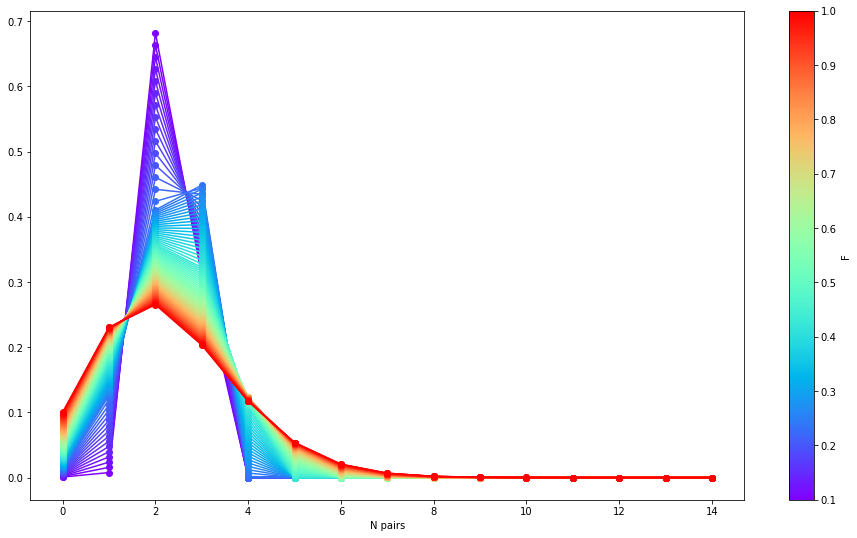

In [10]:
mu= 2.3
Fmin,Fmax,NValues = 0.1 , 1 , 100
Fvalues = np.linspace(Fmin,Fmax,NValues)
from matplotlib import cm
colormap = cm.rainbow
norm=plt.Normalize(Fmin,Fmax)

xx = np.array(range(0,15,1))
fig = plt.figure(figsize=(16,9))
for F in Fvalues:
    plt.plot(xx,Prob_DWB_arraymu(xx,mu,F),"-o",color=colormap(norm(F)))
    plt.xlabel("N pairs")

scalarmappaple = cm.ScalarMappable(norm=plt.Normalize(Fmin,Fmax), cmap=colormap)
scalarmappaple.set_array(NValues)
cbar = plt.colorbar(scalarmappaple)
cbar.set_label("F")     

Below are sanity cross-check plots which tend to indicate that there is no bug in this complicated function

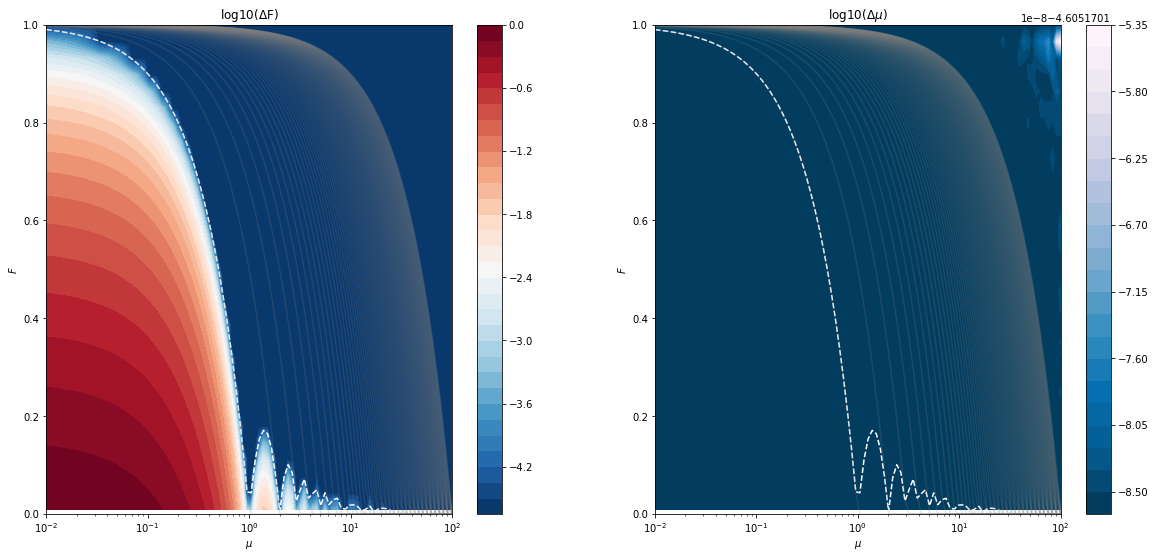

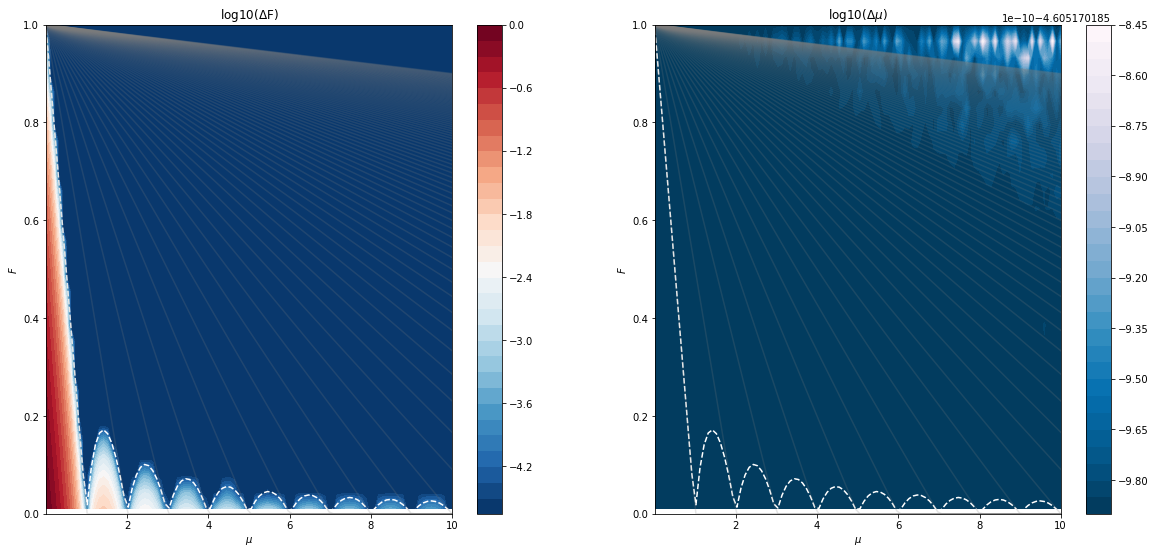

In [4]:
def checkDWB(mumin = 0.01, mumax = 10, Nmu = 30, logmu = True,Fmin = 0.01, Fmax = 1, NF = 30, logF = False):
    
    mulist = np.linspace(mumin,mumax,Nmu) if logmu==False else np.logspace(np.log10(mumin),np.log10(mumax),Nmu)
    Flist  = np.linspace(Fmin,Fmax,NF) if logF==False else np.logspace(np.log10(Fmin),np.log10(Fmax),NF)
    mus, Fs = np.meshgrid(mulist,Flist)
    
    Nmax = 300
    xx = np.arange(0,Nmax,1).astype(int)   # array of N to calculate probabilités of P(N|mu). Maximum value should be high enough wrt to mumax
    
    ZvaluesF = np.zeros_like(mus)
    ZvaluesMEAN = np.zeros_like(mus)
    for i in range(mus.shape[0]):                     
        for j in range(mus.shape[1]):
            mu = mus[i][j]
            F = Fs[i][j]
            probs = Prob_DWB_arraymu(xx,mu,F)
            testmean,testF = GetMeanAndF(xx,probs) 

            ZvaluesF[i][j] = np.log(abs(testF - F)+0.01)
            ZvaluesMEAN[i][j] = np.log(abs(testmean - mu)+0.01)
    
    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=([20,9]))#,constrained_layout=True)
    ax1,ax2 = axs
    #plt.contour(mus, Fs,Zvalues,levels=40, linewidths=5, cmap="RdBu_r")
    ca1 = ax1.contourf(mus, Fs,ZvaluesF,levels=30,cmap="RdBu_r")
    ca2 = ax2.contourf(mus, Fs,ZvaluesMEAN,levels=30,cmap='PuBu_r')
    #ax1.scatter(mus, Zvalues,c=Zvalues,cmap="RdBu_r",edgecolors="black")
    
    [ax.plot(mulist,Bernoulli_F(mulist),'w--') for ax in axs]
    [ax.set_xscale('log') for ax in axs if logmu]
    [ax.set_yscale('log') for ax in axs if logF]
        
    [ax.set_ylim((0,1)) for ax in axs]
    [ax.set_xlabel("$\mu$") for ax in axs]
    [ax.set_ylabel("$F$") for ax in axs]
    ax1.set_title("log10($\Delta$F)")
    ax2.set_title("log10($\Delta\mu$)")

    for n in range(100):
        ftemp = 1 - mulist/(n+1)
        ftemp2 = np.where(ftemp>=0,ftemp,0.)
        #plt.plot(mulist,ftemp2,'-',color='gray',alpha=0.5)
        [ax.plot(mulist,ftemp2,'-',color='gray',alpha=0.2) for ax in axs]

    fig.colorbar(ca1,ax=ax1)
    fig.colorbar(ca2,ax=ax2)
    
checkDWB(mumin = 0.01, mumax = 100, Nmu = 100,logmu = True,Fmin = 0.01,Fmax = 1,NF = 30, logF = False)
checkDWB(mumin = 0.01, mumax = 10, Nmu = 100,logmu = False,Fmin = 0.01,Fmax = 1,NF = 30, logF = False)